<a href="https://colab.research.google.com/github/k3ssdev/IADB_PIA/blob/main/103_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Los módulos básicos para usar Inteligencia Artificial: ```numpy``` y ```pandas```.

Durante este nuevo _cuadernillo_, haremos uso del módulo de ```pandas```, que nos permite trabajar con datos tabulares (como si fuesen una tabla).

Esta librería es fundamental para cualquier algoritmo de Aprendizaje Supervisado (veremos qué es esto más adelante), así que conocer que existe y lo que se puede hacer con ella es crucial.

# Pandas

## Instalación

Tal y como vimos con ```numpy```, vamos a reinstalar ```pandas```.

In [ ]:
!pip install pandas

Para sorpresa de nadie, ```pandas``` tiene varias dependencias (utiliza varios submódulos), entre ellos, ```numpy```.

Al igual que ```numpy``` solía importarse como ```np```, ```pandas``` suele importarse como ```pd```.

In [ ]:
import pandas as pd

# La pieza clave: el ```DataFrame```.

La pieza más importante (aunque no la más pequeña) de ```pandas``` son los ```DataFrame```, que nos permiten trabajar con datos en formato de tabla.

Vamos a crear nuestro primer ```dataframe``` de forma que contenga algunos nombres.

In [ ]:
df = pd.DataFrame({"name": ["Pepe", "Ana", "Marta"]}) ; df

,name
0,Pepe
1,Ana
2,Marta


Como puedes ver, la **representación** de un ```dataframe``` está modificada para ver el resultado en ese formato _tabla_.

En la celda anterior, podemos ver, a la izquierda del todo, los índices de las filas del ```dataframe```. No todos los ```dataframe``` utilizan índices, incluso algunos utilizan índices complejos, pero es muy común ver las filas numeradas empezando por el cero.

Por otra parte, el ```dataframe``` que hemos creado (fíjate cómo, con un diccionario con una clave --name-- y una lista con tres valores) ha dado lugar a una columna con tres filas. La cabecera (el nombre de las columnas) se marca en negrita, mientras que los valores para cada fila penden hacia abajo.

Una operación muy común es recoger los nombres de las cabeceras, esto lo podemos hacer desde el atributo ```columns```.

In [ ]:
df.columns

Index(['name'], dtype='object')

Fíjate que el resultado no es exáctamente una lista, es un objeto de tipo **índice**. El hecho de que esta información se almacene en un atributo significa que podemos modificar las cabeceras de nuestros ```dataframe``` de una forma super sencilla:

In [ ]:
df.columns = ["nombres"] ; df

,nombres
0,Pepe
1,Ana
2,Marta


De hecho, cuando recojamos bancos de información que contengan columnas con nombres poco intuitivos, deberíamos cambiarlos por otros que entendamos mejor.

En este primer ejemplo, hemos creado nuestro ```dataframe``` a partir de un diccionario que solo contenía una clave, pero podemos crear otros ```dataframe``` de mútiples formas. Por ejemplo, con un diccionario con varios valores:

In [ ]:
df = pd.DataFrame({"names": ["Pepe", "Marta", "Ana"], "ages": [20, 30, 40]}) ; df

,names,ages
0,Pepe,20
1,Marta,30
2,Ana,40


En general, cada columna representará una característica de nuestro conjunto de datos (también llamada **feature**). Estas columnas son una unidad de información más pequeña llamada ```Serie```.

# Métodos de acceso a la información

Podemos acceder a cualquier columna del ```dataframe``` haciendo uso de la notación de subscripción (o indexada), como si fuese un diccionario.

In [ ]:
df["names"] # devuelve la Serie "names"

,names
0,Pepe
1,Marta
2,Ana


In [ ]:
df["ages"] # devuelve la Serie ages

,ages
0,20
1,30
2,40


Fíjate que, como ```pandas``` utiliza ```numpy```, las ```Serie``` también son tipadas. No podemos tener dos tipos distintos en una misma ```Serie```. Esto es ligeramente mentira, dado que si tenemos dos tipos distintos se representarán como ```object``` (como en el caso de las cadenas de caracteres).

Si, por otra parte, queremos acceder a cada una de las filas de nuestro ```dataframe```, podremos utilizar el atributo ```iloc``` (_index-location_).

In [ ]:
df.iloc[0]

,0
names,Pepe
ages,20


De esta forma, podríamos llegar a iterar todas las entradas de un ```dataframe``` buscando algunas que cumplan alguna condición:

In [ ]:
for i in range(len(df)):
  row = df.iloc[i]

  if row[0] == "Pepe":
    print("¡Es Pepe! En la fila", i)

¡Es Pepe! En la fila 0


<ipython-input-12-30b2fa86693a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == "Pepe":


Veremos que hay formas más eficientes de hacer esto, pero esta es una forma funcional para ```dataframe``` pequeños.

Otra forma de acceder a cada una de las columnas, al menos si éstas no contienen espacios, es directamente como si fuese un atributo del ```dataframe``` (recuerda que en Python se pueden generar atributos de forma dinámica, y es justamente lo que se está haciendo aquí):

In [ ]:
df.ages

,ages
0,20
1,30
2,40


# Sub```dataframe```

Otra operación muy común en la programación de IA es crear subconjuntos de datos.

Cuando queramos hacer esto, le pasaremos a nuestro ```dataframe``` una lista de columnas con las que nos queremos quedar. Por ejemplo, del ```dataframe``` de antes:

In [ ]:
df

,names,ages
0,Pepe,20
1,Marta,30
2,Ana,40


In [ ]:
df[["names"]] # genera un nuevo dataframe con solo la columna names

,names
0,Pepe
1,Marta
2,Ana


Fíjate lo diferente que es de **pedir** la columna _names_.

In [ ]:
df.names

,names
0,Pepe
1,Marta
2,Ana


Y es que mientras que el sub```dataframe``` crea otro ```dataframe```, la petición de una columna genera una ```Serie``` (no te preocupes, te vas a comer este error miles de veces a partir de ahora: crearás ```Serie``` donde necesites ```dataframe``` y _viceversa_ miles de veces).

También podemos crear sub```dataframe``` filtrando información del ```dataframe``` original. Por ejemplo, vamos a quedarnos con los mayores de 30 años:

In [ ]:
df[df.ages >= 30] # ¿te resulta familiar lo que hay dentro de los corchetes? En efecto: es una máscara booleana

,names,ages
1,Marta,30
2,Ana,40


In [ ]:
df.ages > 30

,ages
0,False
1,False
2,True


Y es que todo lo que has aprendido sobre ```numpy``` lo puedes aplicar en ```pandas```, porque recuerda que ```pandas``` usa ```numpy```.

Por ejemplo: vamos a quedarnos con todos los datos menos con el primero:

In [ ]:
df.iloc[1:]

,names,ages
1,Marta,30
2,Ana,40


O con el último dato:

In [ ]:
df.iloc[-1]

,2
names,Ana
ages,40


Cuidado al crear **máscaras booleanas**, porque usan los operadores lógicos de **C** y **Java** (los que ya conoces). Además, tendrás que poner paréntesis en todas las **máscaras** que crees si tienes más de una.

In [ ]:
df[(df.ages >= 30) & (df.names == "Ana")]

,names,ages
2,Ana,40


In [ ]:
df[(df.ages < 30) | (df.names == "Ana")]

,names,ages
0,Pepe,20
2,Ana,40


# Cargar un gran ```dataframe```

Lo que hemos visto hasta ahora puede ser más o menos interesante, pero sin duda hemos trabajado con un ```dataframe``` de juguete que dista mucho de la realidad.

Ahora, vamos a cargar un nuevo conjunto de datos a partir de un fichero ```csv```. Para ello, le pasaremos a la función ```read_csv``` el ```path``` al fichero ```csv```. Esto también podrías hacerlo con una URL que apuntase a un ```csv```.

Podríamos hacer esto de forma programática, pero para que aprendas a subir ficheros a Google Colab lo haremos a mano esta vez. Accede a [este repositorio](https://www.kaggle.com/datasets/uciml/iris/data?select=Iris.csv), descarga el conjunto de datos (produra pulsar sobre el botón de descargar que **NO ES NEGRO**, porque ese botón descarga todo el conjunto de datos, incluida cierta metainformación) y arrástralo a la zona de archivos (a la izquierda, en el menú desplegable) de Google Colab. Una vez subido, puedes pulsar con el botón derecho sobre él y copiar la ruta o, simplemente, pasar su nombre a la función ```read_csv```.

Más adelante también veremos que existen módulos que agrupan múltiples conjuntos de datos de prueba para hacer análisis de datos.

In [ ]:
df = pd.read_csv("Iris.csv") # leemos el csv
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Como puedes ver abajo a la izquierda, este conjunto de datos tiene 150 filas y 6 columnas (es bastante más grande que el conjunto de prueba que hemos visto antes).

Lo bueno de que sea un conjunto tan grande de datos es que nos va a permitir hacer un **Análisis Exploratorio de Datos**, que es lo primero que hay que hacer siempre al recibir un nuevo _dataset_. Básicamente: **¿con qué vamos a trabajar?**

# Análisis Exploratorio de Datos (AED)

## Eliminación de columnas inútiles

En un AED, buscaremos explicar de forma resumida la información más relevante a simple vista de nuestro conjunto de datos. Por ejemplo, podemos comenzar explicando cada una de las columnas.

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Este ```dataset``` contiene información sobre las dimensiones de los sépalos y los pétalos de diversas flores que pertenecen a distintas especies. Además, encontramos una columna que identifica cada una de las filas del conjunto de datos.

Como no nos interesa identificar cada una de las filas (puede ser un requisito para una base de datos, pero no para un conjunto que se va a tratar con IA), procedemos a eliminar esa columna.

Para eliminar una columna, podemos simplemente crear un sub```dataframe``` con todas las columnas menos esa.

In [ ]:
sub_columns = df.columns[1:] # quito la primera
df = df[sub_columns]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Análisis estadístico inicial

Ahora, nos interesa saber de qué tipos son los datos a los que nos vamos a enfrentar. A primera vista, puede parecer que las medidas en centímetros son valores reales y la clase de la planta es una cadena de caracteres. Esto es algo muy típico, de hecho, esta columna generalmente es llamada **etiqueta** (_**label**_), y sería lo que, por ejemplo, querríamos llegar a predecir si quisiésemos crear un modelo que identificase plantas ```iris```.

Para ver un análisis general del dataset, podemos usar las funciones ```info``` y ```describe```.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


La primera función nos indica el tipo de datos y la cantidad de entradas. Vemos, por ejemplo, que todas las **features** tienen valor para todas las filas, es decir, **NO** existen datos nulos en este conjunto de datos. Si existiesen (como veremos en el siguiente tema), tendríamos que trabajar con ellos en el preprocesado de la información.

El segundo método nos devuelve un análisis estadístico para todas las columnas (**features**) numéricas. En este caso, nos devuelve la cantidad de filas, la media de éstas, la desviación típica, el valor mínimo, los cuartiles y el valor máximo. Si no conoces alguno de estos estadísticos, échale un ojo en Google para enterarte. Los más utilizados, sobre todo para la estandarización, son la media y la desviación típica.

Otro paso interesante sería estudiar cuántas clases distintas existen en este conjunto de datos, es decir, la unicidad de la columna **Species**.

In [ ]:
df.Species.unique() # cuidado porque es sensible a mayúsculas

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Con la función ```unique```, que devuelve los valores sin repetición de una ```Serie```, podemos observar que solo existen tres tipos de ```iris``` en este conjunto de datos.

## Observación sobre datos atípicos (```outliers```)

De hecho, solo con esta función, ya podríamos intuir la existencia de **valores atípicos** u _**outliers**_, valores que se salen de lo normal en las observaciones. Por ejemplo, si la media está muy alejada de la mediana (cuartil 2 --50%--), entonces significa que hay una desviación de los datos. En nuestros datos, esto lo puedes observar en la **feature** _PetalLengthCm_.

El análisis de valores atípicos lo postpondremos para el siguiente tema (es muy interesante, así podemos detectar, por ejemplo, ataques a páginas web o potenciales clientes). Por ahora, nos conformamos con habernos dado cuenta de la diferencia tan notoria en este conjunto de datos.

## Análisis de la dimensionalidad, creación de nuevas **features**

Como el ```dataframe``` que estamos investigando tiene más de dos **features**, no podemos representarlo en 2D (básicamente, un conjunto de datos tiene tantas dimensiones como **features**). Para poder representarlo, necesitamos reducir la cantidad de columnas.

Afortunadamente, podemos crear nuevas columnas que resuman la información que ya tenemos. En este caso, con el largo y el ancho, podemos calcular el área.

Para ello, tendremos que realizar operaciones con las ```Serie``` que representan esos datos, pero no hay problema (ya hemos visto cómo afronta ```numpy``` estos problemas). No va a ser muy complicado multiplicar, por tanto, varias columnas:

In [ ]:
df.PetalLengthCm * df.PetalWidthCm

,0
0,0.28
1,0.28
2,0.26
3,0.30
4,0.28
...,...
145,11.96
146,9.50
147,10.40
148,12.42


Y, para guardar esta información en una nueva variable, simplemente lo hacemos con la notación de diccionario:

In [ ]:
df["PetalArea"] = df.PetalLengthCm * df.PetalWidthCm
df["SepalArea"] = df.SepalLengthCm * df.SepalWidthCm
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalArea,SepalArea
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,11.96,20.10
146,6.3,2.5,5.0,1.9,Iris-virginica,9.50,15.75
147,6.5,3.0,5.2,2.0,Iris-virginica,10.40,19.50
148,6.2,3.4,5.4,2.3,Iris-virginica,12.42,21.08


Ahora podemos crear un sub```dataframe``` con solo la información de las **Species** y las áreas.

Fíjate en cómo ordeno las columnas para que luego estén ordenadas en el sub```dataframe```.

In [ ]:
_df = df[["PetalArea", "SepalArea", "Species"]] # lo llamo _df para no perder el df original
_df

,PetalArea,SepalArea,Species
0,0.28,17.85,Iris-setosa
1,0.28,14.70,Iris-setosa
2,0.26,15.04,Iris-setosa
3,0.30,14.26,Iris-setosa
4,0.28,18.00,Iris-setosa
...,...,...,...
145,11.96,20.10,Iris-virginica
146,9.50,15.75,Iris-virginica
147,10.40,19.50,Iris-virginica
148,12.42,21.08,Iris-virginica


Finalmente, con la **dimensionalidad reducida**, puedo representar esta información. Como tengo tres columnas, necesitaré tres dimensiones. Supongamos que no tenemos las especies para ver el caso del 2D:

In [ ]:
import matplotlib.pyplot as plt

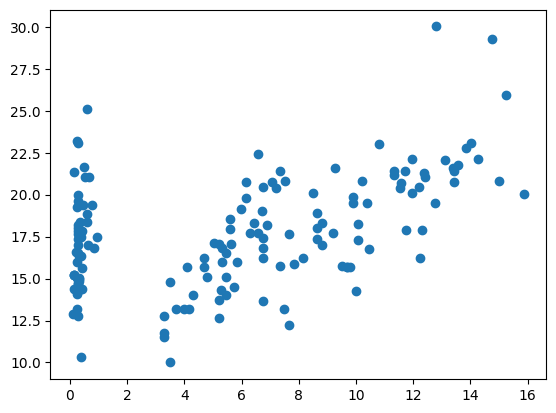

In [ ]:
plt.scatter(_df.PetalArea, _df.SepalArea);

En el gráfico anterior, tenemos el área de los pétalos en las X y el área de los sépalos en las Y. Como puedes ver, hay varios grupos.

Uno de los primeros modelos de IA que veremos serán los **NO** supervisados. Estos modelos trabajarán con los datos tal y como los estamos viendo nosotros ahora, e intentarán agruparlos de distintas formas. Está claro, por ejemplo, que esos tres puntitos de arriba a la derecha son casos excepcionales de este conjunto de datos. Además, parece que hay un grupo de ```iris``` cuyo área de pétalo es muy, muy pequeña. ¿Será esto suficiente como para identificar a estas plantas?

Para ello, representaremos también las especies de las ```iris```. Ahora presta atención: **para representar varias dimensiones en 2D, no es necesario inventarse la profundidad**. Por ejemplo, puedes usar distintos colores y así representar una nueva dimensión, o cambiar el tamaño de los puntos.

Para ello, tenemos que codificar las especies a un color (o número). En este caso, lo haremos a un color para que veas cómo se aplica, por ejemplo, la función ```map``` sobre un ```dataframe```.

In [ ]:
_df["SpeciesColor"] = _df["Species"].apply(lambda s: "red" if s == "Iris-setosa" else "yellow" if s == "Iris-versicolor" else "green")
_df

<ipython-input-39-d7057adf9328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["SpeciesColor"] = _df["Species"].apply(lambda s: "red" if s == "Iris-setosa" else "yellow" if s == "Iris-versicolor" else "green")


,PetalArea,SepalArea,Species,SpeciesColor
0,0.28,17.85,Iris-setosa,red
1,0.28,14.70,Iris-setosa,red
2,0.26,15.04,Iris-setosa,red
3,0.30,14.26,Iris-setosa,red
4,0.28,18.00,Iris-setosa,red
...,...,...,...,...
145,11.96,20.10,Iris-virginica,green
146,9.50,15.75,Iris-virginica,green
147,10.40,19.50,Iris-virginica,green
148,12.42,21.08,Iris-virginica,green


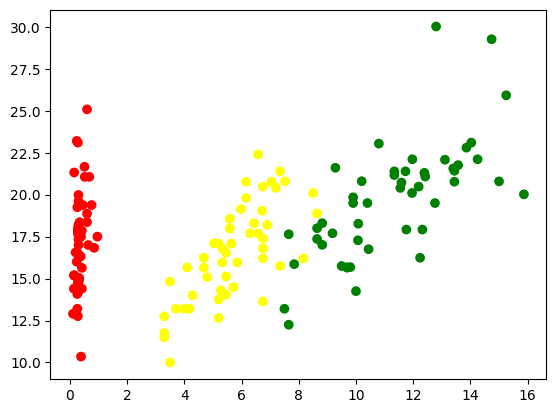

In [ ]:
plt.scatter(_df.PetalArea, _df.SepalArea, c=_df.SpeciesColor);

Como ves, nuestra predicción era bastante buena. El grupo rojo (_iris-setosa_) es claramente identificable por el área de sus pétalos. Esto que acaba de pasar es muy raro de ver, pero cuando sucede hay que aprovecharlo al máximo. Acabamos de encontrar una **superfeature**, porque nos permite identificar a **todos** los individuos de una clase.

Podría suceder que nuestro ```dataframe``` tuviese muchísimas columnas (muchísimas dimensiones). Esto es un problema denominado **infierno de la dimensionalidad** y lo trabajaremos más a fondo en el siguiente tema. Por ahora, debes quedarte con que, en esos casos, se aplican técnicas matemáticas que permiten eliminar dimensiones que no sean importantes para explicar los datos que se están observando (son el caso contrario a nuestra **superfeature**).

### Alternativas al lambda

Puedes lograr el mismo resultado utilizando otras técnicas en *pandas*, como `np.where` o el método `map`. Aquí te muestro algunas alternativas:

#### 1. Usando `np.where`

`np.where` es una función condicional que puede anidar múltiples condiciones.

```python
import numpy as np

_df["SpeciesColor"] = np.where(
    _df["Species"] == "Iris-setosa", "red",
    np.where(_df["Species"] == "Iris-versicolor", "yellow", "green")
)
```

#### 2. Usando `map`

Puedes crear un diccionario para mapear cada especie a un color, y luego usar `map` para transformar la columna `Species` en `SpeciesColor`.

```python
color_map = {
    "Iris-setosa": "red",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "green"
}

_df["SpeciesColor"] = _df["Species"].map(color_map)
```

### 3. Usando `apply` con una función regular

En lugar de una función *lambda*, puedes definir una función regular y aplicarla usando `.apply()`.

```python
def species_to_color(s):
    if s == "Iris-setosa":
        return "red"
    elif s == "Iris-versicolor":
        return "yellow"
    else:
        return "green"

_df["SpeciesColor"] = _df["Species"].apply(species_to_color)
```

#### 4. Usando `replace`

Si solo necesitas una asignación simple sin condiciones complejas, `replace` también puede ser una buena opción:

```python
_df["SpeciesColor"] = _df["Species"].replace({
    "Iris-setosa": "red",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "green"
})
```


## Agrupación por clases

Aprovechando que tenemos un ```dataframe``` con **labels**, podemos agrupar la información de dicho ```dataframe``` por esas **labels**, como si fuese una operación de ```group by``` en una base de datos (de hecho, el nombre de la función es justamente ese).

In [ ]:
df.groupby("Species")

Este objeto tan raro contiene información estadística de nuestra agrupación. Por ejemplo, podemos ver los estadísticos para cada clase:

In [ ]:
df.groupby("Species").describe().transpose() # lo transpongo para verlo mejor

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    50.000000        50.000000       50.000000
              mean      5.006000         5.936000        6.588000
              std       0.352490         0.516171        0.635880
              min       4.300000         4.900000        4.900000
              25%       4.800000         5.600000        6.225000
              50%       5.000000         5.900000        6.500000
              75%       5.200000         6.300000        6.900000
              max       5.800000         7.000000        7.900000
SepalWidthCm  count    50.000000        50.000000       50.000000
              mean      3.418000         2.770000        2.974000
              std       0.381024         0.313798        0.322497
              min       2.300000         2.000000        2.200000
              25%       3.125000         2.525000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.675000         3.000000        3.175000
              max       4.400000         3.400000        3.800000
PetalLengthCm count    50.000000        50.000000       50.000000
              mean      1.464000         4.260000        5.552000
              std       0.173511         0.469911        0.551895
              min       1.000000         3.000000        4.500000
              25%       1.400000         4.000000        5.100000
              50%       1.500000         4.350000        5.550000
              75%       1.575000         4.600000        5.875000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    50.000000        50.000000       50.000000
              mean      0.244000         1.326000        2.026000
              std       0.107210         0.197753        0.274650
              min       0.100000         1.000000        1.400000
              25%       0.200000         1.200000        1.800000
              50%       0.200000         1.300000        2.000000
              75%       0.300000         1.500000        2.300000
              max       0.600000         1.800000        2.500000
PetalArea     count    50.000000        50.000000       50.000000
              mean      0.362800         5.720400       11.296200
              std       0.183248         1.368403        2.157412
              min       0.110000         3.300000        7.500000
              25%       0.265000         4.860000        9.717500
              50%       0.300000         5.615000       11.445000
              75%       0.420000         6.750000       12.790000
              max       0.960000         8.640000       15.870000
SepalArea     count    50.000000        50.000000       50.000000
              mean     17.208800        16.526200       19.684600
              std       2.947688         2.866882        3.458783
              min      10.350000        10.000000       12.250000
              25%      15.040000        14.347500       17.430000
              50%      17.000000        16.385000       20.060000
              75%      19.155000        18.495000       21.412500
              max      25.080000        22.400000       30.020000

Por ejemplo, si mirásemos el área de pétalo, podríamos ver la diferencia que hemos visto antes gráficamente.

In [ ]:
_df.groupby(["Species", "SpeciesColor"])[["PetalArea"]].describe()

PetalArea                                   \
                                 count     mean       std   min     25%   
Species         SpeciesColor                                              
Iris-setosa     red               50.0   0.3628  0.183248  0.11  0.2650   
Iris-versicolor yellow            50.0   5.7204  1.368403  3.30  4.8600   
Iris-virginica  green             50.0  11.2962  2.157412  7.50  9.7175   

                                                    
                                 50%    75%    max  
Species         SpeciesColor                        
Iris-setosa     red            0.300   0.42   0.96  
Iris-versicolor yellow         5.615   6.75   8.64  
Iris-virginica  green         11.445  12.79  15.87

Fíjate en la gran diferencia que hay entre las ```iris-setosa``` y las ```iris-virginica``` en la media de área de su pétalo.

## Análisis de correlación

Para terminar el AED, vamos a hablar sobre las variables correladas.

Este tipo de variable son un gran problema para los modelos de IA, y es que explican información que ya está siendo explicada por otras **features** del mismo _dataset_. En nuestro ```dataframe```, dos **features** correladas serían las dimensiones y las áreas, dado que una se obtiene directamente de la otra.

En general, estos valores deben estudiarse y eliminarse del conjunto de datos (da igual cuál de las dos se borre), dado que puede afectar a la eficiencia de los modelos de IA.

```pandas``` tiene una función que nos permite realizar un análisis de correlación entre las variables numéricas del _dataset_.

In [ ]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalArea,SepalArea
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.857326,0.683362
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.280612,0.645421
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.958472,0.366584
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.980229,0.375365
PetalArea,0.857326,-0.280612,0.958472,0.980229,1.000000,0.459484
SepalArea,0.683362,0.645421,0.366584,0.375365,0.459484,1.000000


Como puedes observar, cada **feature** se correlaciona consigo misma en un nivel de 1 (nivel máximo de correlación). Por otra parte, hay otras que no están nada correladas, como las dimensiones de los sépalos (valores cercanos a cero, ya sean positivos o negativos) y otros que están altamente correlados, como las áreas y las dimensiones.

Una correlación entre dos variables indica que esas dos variables explican la misma **feature**. En palabras más sencillas, indican que esas dos **features** se comportan de la misma forma: cuando una sube su valor, la otra también lo hace; y _viceversa_.

Por otra parte, dos **features inversamente correladas** se comportan de forma completamente contraria: cuando una sube, la otra baja. Ambas correlaciones deben ser eliminadas.

Finalmente, huelga decir que podemos tener una representación gráfica de esta matriz para ver mejor las correlaciones:

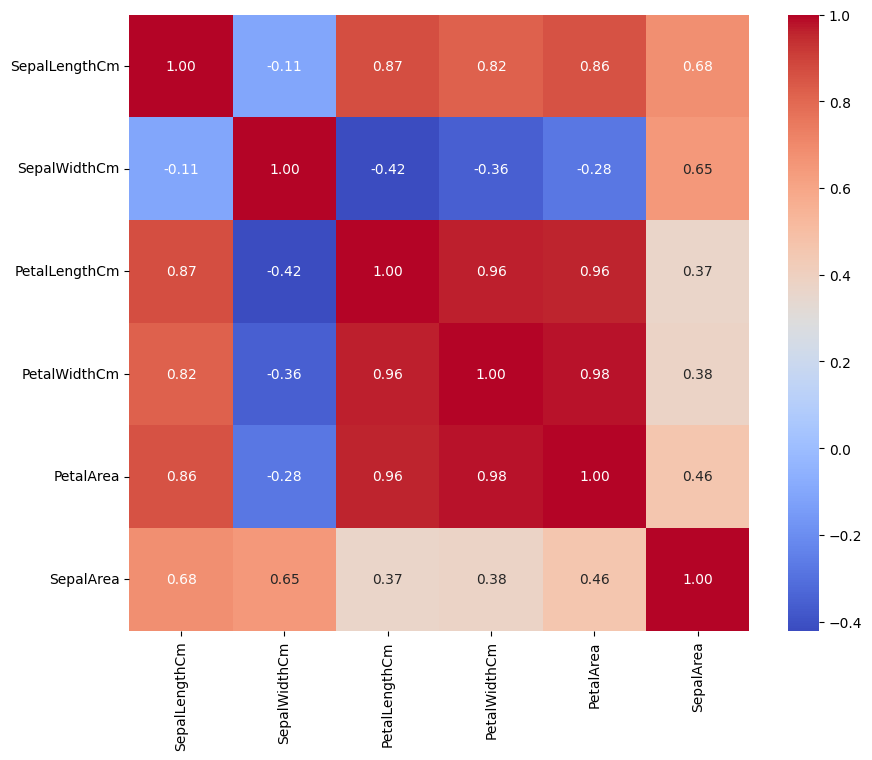

In [ ]:
import seaborn as sns # otro modulo para visualización de datos, lo usaremos en una de las tareas entregables para cargar los datos de una forma más sencilla

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.show()

Cuánto más rojos sean los cuadrados (sobre todo si suben del 70 - 80%), más razones tendríamos para eliminarlos del _dataset_.

# Resumen

Durante este _cuadernillo_ hemos visto cómo podemos utilizar el módulo de ```pandas``` para visualizar nuestros datos.

Hemos aprendido a cargar nuestros datos, _toquitearlos_ un poco y hemos puesto mucho énfasis a la elaboración de un informe de AED (análisis exploratorio de datos). Este informe, aunque pudiera parecer inútil, puede ayudarte a encontrar anomalías o trucos que simplifiquen tus problemas de forma exponencial, así que deberías acostumbrarte a, al menos, echar un ojo a tus datos (tu modelo te dará las gracias).

Sin embargo, hay mucha funcionalidad que se nos ha quedado en el tintero. No te preocupes, la seguiremos viendo a lo largo del curso, por ejemplo:
- Estandarización de datos.
- División en conjuntos de entrenamiento y testeo.
- Imputación de valores nulos.
- Técnicas de reducción de la dimensionalidad.
- Codificación de variables categóricas.
- ...